<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 9 </b></center>
<h3> Name: Mudit Bhatt
<h3> En: 23010101607
<center><b><h5>K-means, K-Medoids</b></center>
<pre>    

# Step 1: Import Libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import seaborn as seab
from sklearn.preprocessing import StandardScaler


ModuleNotFoundError: No module named 'sklearn_extra'

# Step 2: Load the Dataset
Load Given dataset -  StudentsPerformance.csv

In [52]:
df = pd.read_csv("./StudentsPerformance.csv")

In [53]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# Step 3: Data Overview
In this step, we examine the dataset structure, summary statistics, and check for missing values.

In [54]:
print("<--------Head-------->")
print(df.head())  
print("<--------describe-------->")
print(df.describe())
print("<--------isnull and Sum-------->")
print(df.isnull().sum())
print("<--------shape-------->")
print(df.shape)
print("<--------info-------->")
print(df.info)

<--------Head-------->
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<--------describe-------->
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.0

# Step 4: Display PairPlot

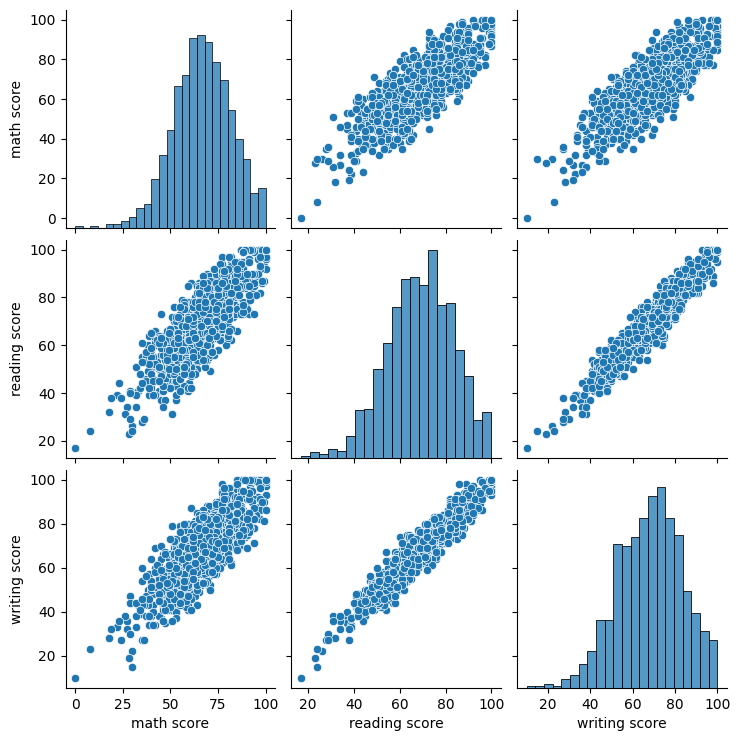

In [55]:
seab.pairplot(df)

# Step 5: Correlation heatmap

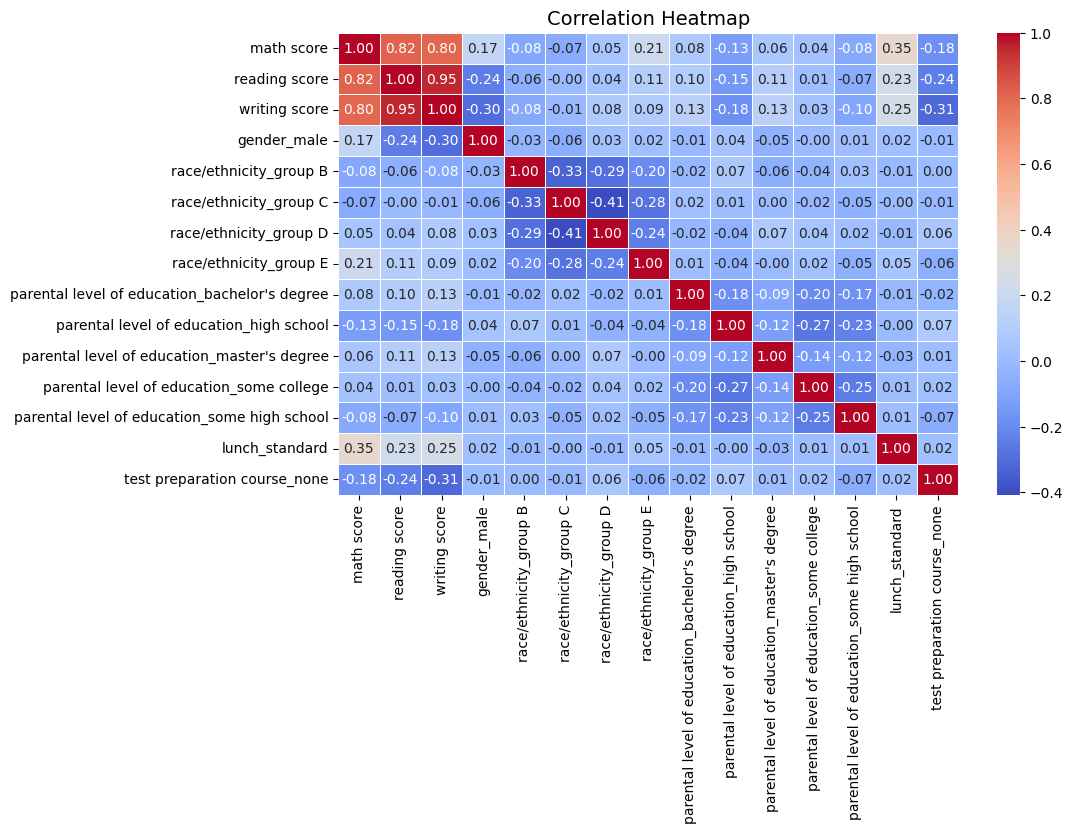

In [56]:

df_numeric = pd.get_dummies(df, drop_first=True)

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 6))

seab.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap", fontsize=14)

plt.show()

# Step 6: Distribution of numerical features

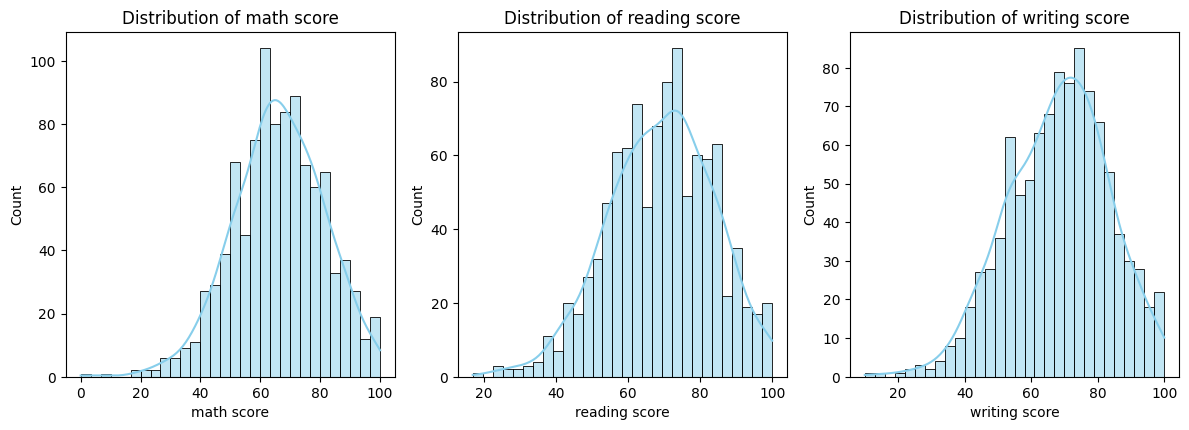

In [57]:

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  
    seab.histplot(df[col], bins=30, kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


# Step 7: Apply StandardScaler

In [73]:



scaler = StandardScaler()

X_scaled = scaler.fit_transform(df[numerical_columns])

print(df.head())


   math score  reading score  writing score  gender_male  \
0    0.390024       0.193999       0.391492        False   
1    0.192076       1.427476       1.313269        False   
2    1.577711       1.770109       1.642475        False   
3   -1.259543      -0.833899      -1.583744         True   
4    0.653954       0.605158       0.457333         True   

   race/ethnicity_group B  race/ethnicity_group C  race/ethnicity_group D  \
0                    True                   False                   False   
1                   False                    True                   False   
2                    True                   False                   False   
3                   False                   False                   False   
4                   False                    True                   False   

   race/ethnicity_group E  parental level of education_bachelor's degree  \
0                   False                                           True   
1                   Fals

# Step 8: Elbow method to find optimal k

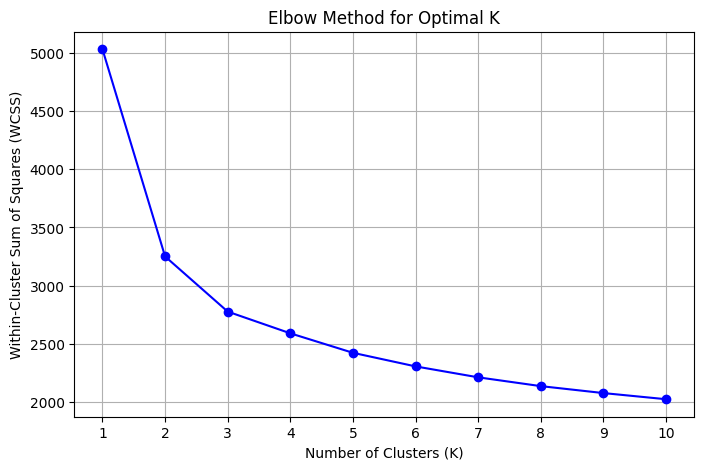

In [59]:
df = pd.get_dummies(df, drop_first=True)  
X=df.values
wcss = []
K_range = range(1, 11)  

for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) 

plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.xticks(K_range)
plt.grid(True)
plt.show()

# Step 9:Based on the elbow plot, choose an appropriate k value (e.g., k=3)

In [64]:
k = 6

kmeans = KMeans(n_clusters=k, random_state=42)

kmeans.fit(X)

KMeans(n_clusters=6, random_state=42)

# Step 10: Print Cluster Center

In [65]:
cluster_center = kmeans.cluster_centers_

print("Cluster center: ", cluster_center)

Cluster center:  [[-4.70558857e-01 -5.24052933e-02  7.24421365e-02  5.31914894e-03
   2.07446809e-01  4.14893617e-01  2.23404255e-01  8.51063830e-02
   1.22340426e-01  1.91489362e-01  7.97872340e-02  2.39361702e-01
   1.32978723e-01  6.17021277e-01  6.80851064e-01]
 [ 1.36138254e+00  1.47054980e+00  1.47410934e+00  3.14285714e-01
   1.28571429e-01  3.21428571e-01  2.50000000e-01  2.42857143e-01
   1.85714286e-01  4.28571429e-02  1.35714286e-01  2.42857143e-01
   1.14285714e-01  8.42857143e-01  4.28571429e-01]
 [-2.12574093e+00 -2.11694902e+00 -2.13288803e+00  4.04255319e-01
   2.55319149e-01  3.19148936e-01  1.70212766e-01  1.27659574e-01
   6.38297872e-02  3.19148936e-01  1.38777878e-17  1.91489362e-01
   3.40425532e-01  2.12765957e-01  8.72340426e-01]
 [-9.79202178e-01 -1.08173092e+00 -1.11057466e+00  6.37305699e-01
   2.02072539e-01  3.41968912e-01  2.38341969e-01  7.77202073e-02
   7.25388601e-02  2.90155440e-01  3.62694301e-02  1.65803109e-01
   1.91709845e-01  4.61139896e-01  7.9

# Step 11: Plot Cluster

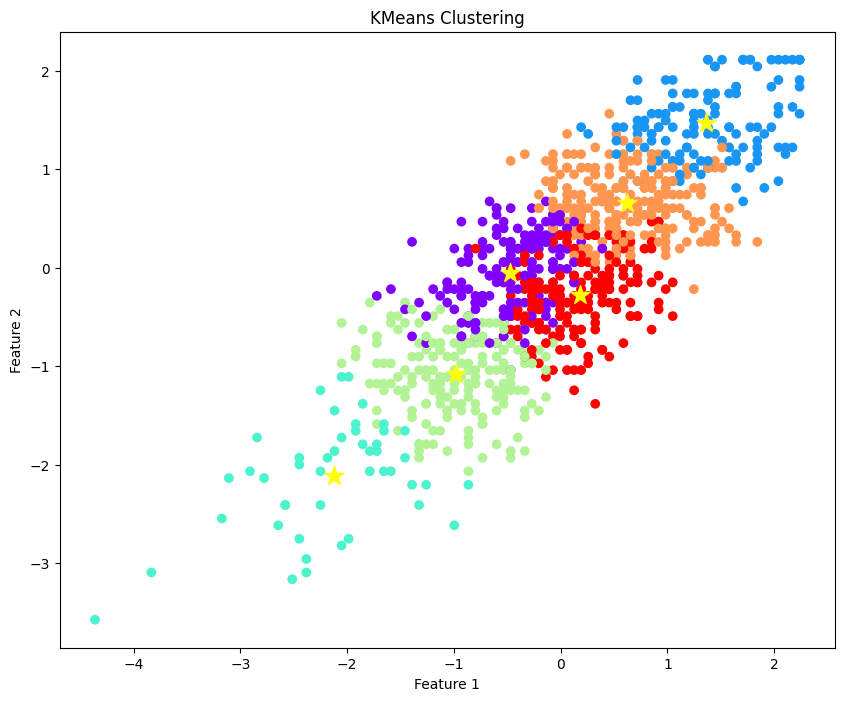

In [66]:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(cluster_center[:, 0], cluster_center[:, 1], marker='*', s=200, c='yellow')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Step 12:Analyze clusters 

In [74]:
silhouette_avg = silhouette_score(X_scaled, df["Cluster"])
print(f"Silhouette Score: {silhouette_avg}")

KeyError: 'Cluster'

# Step 13: Perform K-Medoids

In [75]:
# from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=3, random_state=42)
df["KMedoids_Cluster"] = kmedoids.fit_predict(X_scaled)

NameError: name 'KMedoids' is not defined

# Step:14 Comparison of K-means and K-medoids Clusters

# Step: 15 Implement K- Means with Library
# Sample data points
data = [
    [1, 2], [2, 3], [3, 4],
    [10, 11], [11, 12], [12, 13],
    [50, 51], [51, 52], [52, 53]
]